In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
# import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#  Import and read the heart.csv.
heart = pd.read_csv("data.csv")
heart
#Replacing strings with numbers:  creating a dict file 
gender = {'M': 1,'F': 0}
heart.Sex = [gender[item] for item in heart.Sex]
ex_angina={'N': 0,'Y': 1}
heart.ExerciseAngina = [ex_angina[item] for item in heart.ExerciseAngina]
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [3]:
heart.shape

(918, 12)

In [4]:
#styled describe
heart.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
Sex,918.000000,0.789760,0.407701,0.000000,1.000000,1.000000,1.000000,1.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
ExerciseAngina,918.000000,0.404139,0.490992,0.000000,0.000000,0.000000,1.000000,1.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


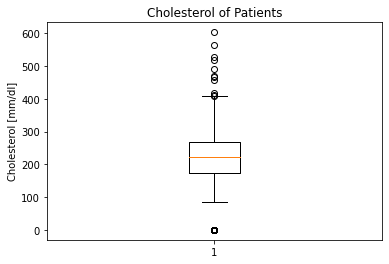

In [59]:
#  look at cholesterol data set and computes quantiles
cholesterol = heart['Cholesterol']
fig1, ax1 = plt.subplots()
ax1.set_title('Cholesterol of Patients')
ax1.set_ylabel('Cholesterol [mm/dl]')
ax1.boxplot(cholesterol)
plt.show()

In [29]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cholesterol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of cholesterol is: {lowerq}")
print(f"The upper quartile of cholesterol is: {upperq}")
print(f"The interquartile range of cholesterol is: {iqr}")
print(f"The the median of cholesterol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of cholesterol is: 173.25
The upper quartile of cholesterol is: 267.0
The interquartile range of cholesterol is: 93.75
The the median of cholesterol is: 223.0 
Values below 32.625 could be outliers.
Values above 407.625 could be outliers.


In [30]:
cholesterol=cholesterol.sort_values()
print(cholesterol)

458      0
369      0
368      0
367      0
366      0
      ... 
250    491
30     518
76     529
616    564
149    603
Name: Cholesterol, Length: 918, dtype: int64


In [31]:
#cleaning the dataset by removing all zeroes in the column "cholesterol" as there is no 0 cholesterole.
clean_df=heart[heart['Cholesterol'] !=0]
clean_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


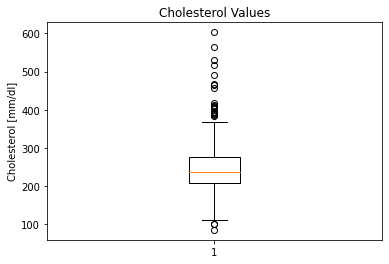

In [37]:
cholesterol2 = clean_df['Cholesterol']
fig1, ax1 = plt.subplots()
ax1.set_title('Cholesterol Values')
ax1.set_ylabel('Cholesterol [mm/dl]')
ax1.boxplot(cholesterol2)
plt.show()

In [33]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cholesterol2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of cholesterol is: {lowerq}")
print(f"The upper quartile of cholesterol is: {upperq}")
print(f"The interquartile range of cholesterol is: {iqr}")
print(f"The the median of cholesterol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of cholesterol is: 207.25
The upper quartile of cholesterol is: 275.0
The interquartile range of cholesterol is: 67.75
The the median of cholesterol is: 237.0 
Values below 105.625 could be outliers.
Values above 376.625 could be outliers.


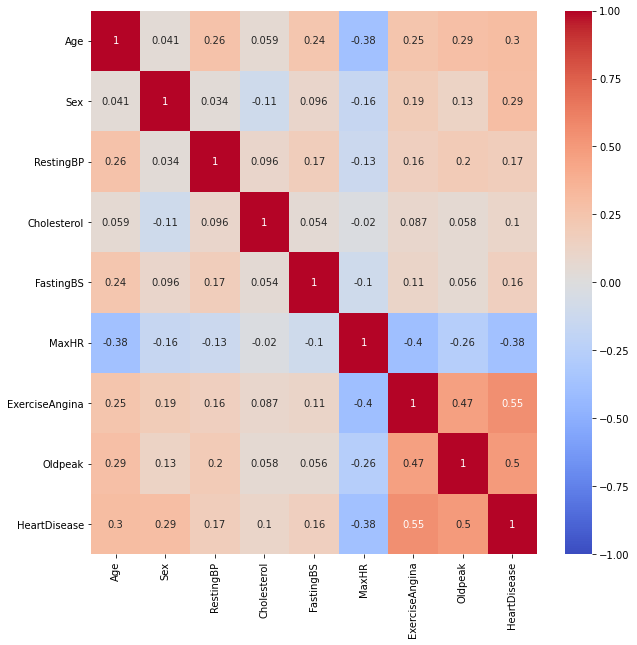

In [34]:
#Correlation Heatmap between the variables
corr = clean_df.corr()
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [39]:
# Project only necessary columns and separate target feature for training data
cholesterol_df = clean_df[['Cholesterol','HeartDisease']]
cholesterol_df.head()

,Cholesterol,HeartDisease
0,289,0
1,180,1
2,283,0
3,214,1
4,195,0


In [41]:
#Load dataset
# Split the dataframe into data and target["HeartDisease"]
y = cholesterol_df['HeartDisease'].values
X = cholesterol_df.drop('HeartDisease', axis=1)

In [42]:
# split our data into training and data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
# Encode the target column with 1s and 0s (both train and test)
X_test = X_test[X_train.columns]
target_encoder = LabelEncoder().fit(y_train)
y_train = target_encoder.transform(y_train)
y_test=target_encoder.transform(y_test)
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [44]:
# Check the shapes to make sure X_train and X_test have the same number of columns (same with y_train/y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 1)
(187, 1)
(559,)
(187,)


In [46]:
#this is for 1 column, cholesterol
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', random_state=25)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.5294117647058824
0.5581395348837209
